(0.0976214946434537, 0.47413461498242043)
(0.07756139737662393, 0.6167737914855305)
(0.06095147811144711, 0.687396489323636)
(0.28193850477001287, 0.06371886129337936)
(-0.24460666095199238, 0.11847314209640446)
(0.04929799139117323, 0.703570905367715)
(0.016335879667879895, 0.9203065686418322)
(0.05001944466462274, 0.719452435124981)
(-0.19144553177843962, 0.21316827406806343)
(-0.09954559173201982, 0.5104042170294785)
(0.19027499390716038, 0.1856538575744862)
(0.21964595189598174, 0.12536648821792987)


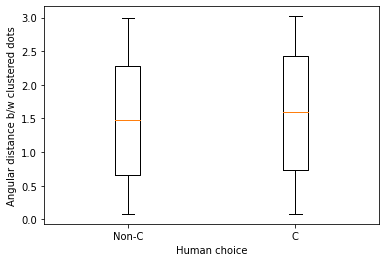

In [5]:
from analysis.data_exp1 import DataExp1
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
proximity_all, accuracy_all = [], []
for pid in DataExp1.pids:
    proximity, accuracy = [], []
    data = DataExp1(pid).data
    for trial in data:
        if trial['ground_truth'] == 'CLU':
            x = np.array(trial['φ'])[:, :3]
            dx = np.abs(x[:, 0] - x[:, 1])
            proximity.append(np.minimum(dx, 2 * np.pi - dx).mean())
            accuracy.append(trial['choice'] == 'CLU')
    proximity_all += proximity
    accuracy_all += accuracy
    df = pd.DataFrame({'proximity': proximity, 'accuracy': accuracy})
    df['accuracy'] = df['accuracy'].astype(float)
    print(pearsonr(df['proximity'], df['accuracy']))
proximity_all, accuracy_all = np.array(proximity_all), np.array(accuracy_all)
_, ax = plt.subplots()
ax.boxplot([proximity_all[~accuracy_all], proximity_all[accuracy_all]])
ax.set_xticklabels(['Non-C', 'C'])
ax.set_xlabel('Human choice')
ax.set_ylabel('Angular distance b/w clustered dots')
plt.savefig('../pub/eLife/proximity.pdf')

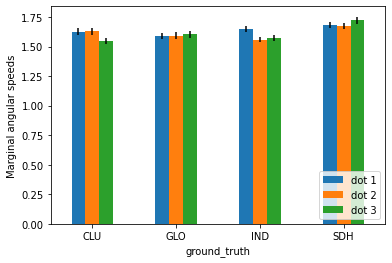

In [1]:
from analysis.data_exp1 import DataMetaExp1
from exp1 import Exp1
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
_, ax = plt.subplots()
v = DataMetaExp1(DataMetaExp1.pids).extract_marginal_speed().groupby('ground_truth')
v.mean().plot.bar(rot=0, yerr=v.sem(), legend=False, ax=ax)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='lower right')
ax.set_ylabel('Marginal angular speeds')
# plt.savefig('../pub/eLife/speed.pdf')
plt.show()
